In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv("Exam_Score_Prediction.csv", index_col=0)
df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
student_id,,,,,,,,,,,,
1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [7]:
string_columns = df.select_dtypes("object").columns
if len(string_columns) != 0:
    print(*string_columns, sep="\n")
else:
    print("Տեքստային սյուներ չեն գտնվել")

gender
course
internet_access
sleep_quality
study_method
facility_rating
exam_difficulty


In [9]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,age,study_hours,class_attendance,sleep_hours,exam_score,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
student_id,,,,,,,,,,,,,,,,,,,,,
1,17,2.78,92.9,7.4,58.9,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,23,3.37,64.8,4.6,54.8,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
3,22,7.88,76.8,8.5,90.3,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,20,0.67,48.4,5.8,29.7,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
5,20,0.89,71.6,9.8,43.7,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [11]:
print(df.corr()['exam_score'].abs().sort_values(ascending=False))

exam_score                    1.000000
study_hours                   0.717788
class_attendance              0.308850
sleep_quality_poor            0.172257
sleep_quality_good            0.172049
facility_rating_low           0.146083
sleep_hours                   0.133222
study_method_self-study       0.101278
study_method_online videos    0.063120
study_method_mixed            0.044980
study_method_group study      0.040377
facility_rating_medium        0.010613
course_bba                    0.008920
course_ba                     0.008727
internet_access_yes           0.007826
age                           0.006522
course_b.sc                   0.004462
gender_male                   0.004342
course_diploma                0.003917
exam_difficulty_hard          0.003068
course_b.tech                 0.002993
gender_other                  0.001799
exam_difficulty_moderate      0.001779
course_bca                    0.000236
Name: exam_score, dtype: float64


In [13]:
corr_matrix = df.corr()
to_drop = []

for i, j in corr_matrix['exam_score'].items():
    if -0.01 <= j <= 0.01 and i != 'exam_score':
        to_drop.append(i)

df = df.drop(columns=to_drop, errors='ignore')
print(f"Հաջողությամբ հեռացվեցին {len(to_drop)} սյուներ։")

Հաջողությամբ հեռացվեցին 12 սյուներ։


In [15]:
df['study_efficiency'] = df['study_hours'] / (df['sleep_hours'] + 0.1)

df['attendance_impact'] = df['class_attendance'] * df['study_hours']

df['total_engagement'] = df['study_hours'] + (df['class_attendance'] / 10)

print(df.corr()['exam_score'].abs().sort_values(ascending=False))

exam_score                    1.000000
attendance_impact             0.762154
total_engagement              0.760294
study_hours                   0.717788
study_efficiency              0.581942
class_attendance              0.308850
sleep_quality_poor            0.172257
sleep_quality_good            0.172049
facility_rating_low           0.146083
sleep_hours                   0.133222
study_method_self-study       0.101278
study_method_online videos    0.063120
study_method_mixed            0.044980
study_method_group study      0.040377
facility_rating_medium        0.010613
Name: exam_score, dtype: float64


In [17]:
constant_col = df.nunique(dropna=False)

found = False

for i, j in constant_col.items():
    if j == 1:
        df.drop(columns=[i], inplace=True)
        found = True

if not found:
    print("Միարժեք սյուներ չեն գտնվել:")

Միարժեք սյուներ չեն գտնվել:


In [19]:
from sklearn.model_selection import train_test_split

target_column = 'exam_score'
X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [67]:
found_nan = False

if df.isnull().sum().sum() == 0:
    print("NaN արժեքներ չեն գտնվել:")
else:
    X_train_nan_values = X_train.isnull().any()
    
    for i, j in X_train_nan_values.items():
        if j == True:
            median_val = X_train[i].median()
            X_train[i].fillna(median_val, inplace=True)
            X_test[i].fillna(median_val, inplace=True)
            found_nan = True

NaN արժեքներ չեն գտնվել:


In [23]:
X_train_num_columns = []
for i in X_train:
    if not X_train[i].isin([0, 1]).all():
        X_train_num_columns.append(i)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[X_train_num_columns] = scaler.fit_transform(X_train[X_train_num_columns])
X_test[X_train_num_columns] = scaler.transform(X_test[X_train_num_columns])

In [25]:
X_train.head()

,study_hours,class_attendance,sleep_hours,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,study_efficiency,attendance_impact,total_engagement
student_id,,,,,,,,,,,,,,
5895,1.239349,-0.756186,1.156364,1,0,1,0,0,0,1,0,0.386419,0.613899,0.540145
3729,1.256681,-0.889533,1.214028,1,0,0,1,0,0,0,1,0.376583,0.538661,0.474193
8959,0.624091,1.696234,0.349059,0,0,1,0,0,0,0,1,0.266207,1.440152,1.515541
7672,0.312128,-1.306966,0.003071,0,1,1,0,0,0,0,0,0.160164,-0.310076,-0.532444
6000,-0.086490,0.490316,0.464388,1,0,1,0,0,0,0,0,-0.308720,0.100792,0.224269


In [27]:
r2_results = {}
mae_results = {}

In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import root_mean_squared_error


models = [
    ("Random Forest",RandomForestRegressor(n_estimators=300, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("KNN", KNeighborsRegressor(n_neighbors=5)),
    ("Ridge", RidgeCV(alphas=[0.1, 1, 10, 50, 100, 500])),
    ("SVR", SVR(kernel="rbf", C=10, epsilon=0.1))
]

In [31]:
results_list = []
for name, model in models:
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    
    r2 =  r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred) 

    r2_results[name] = r2
    mae_results[name] = mae

    results_list.append({"Model": name, "R2 Score": r2, "MAE": mae, "RMSE": rmse})

df_results = pd.DataFrame(results_list)

In [32]:
df_results.head()

,Model,R2 Score,MAE,RMSE
0,Random Forest,0.690360,8.503339,10.524125
1,Gradient Boosting,0.727153,7.976808,9.879090
2,KNN,0.671574,8.696002,10.838680
3,Ridge,0.733266,7.862338,9.767808
4,SVR,0.727577,7.935816,9.871414


In [35]:
from sklearn.ensemble import VotingRegressor

ensemble = VotingRegressor(estimators=[
    ('ridge', RidgeCV(alphas=[0.1, 1, 10, 50])),
    ('svr', SVR(kernel='rbf', C=10)),
    ('gb', GradientBoostingRegressor(random_state=42))
])

ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

y_pred_voting = ensemble.predict(X_test)

r2 = r2_score(y_test, y_pred_voting)
mae = mean_absolute_error(y_test, y_pred_voting)
rmse = root_mean_squared_error(y_test, y_pred_voting)

new_row = pd.DataFrame({
    'Model': ['Voting Ensemble'],
    'R2 Score': [r2],
    'MAE': [mae],
    'RMSE': [rmse]
})

df_results = pd.concat([df_results, new_row], ignore_index=True)

In [37]:
df_results_sorted = df_results.sort_values(by='RMSE', ascending=True)

print(df_results_sorted)

               Model  R2 Score       MAE       RMSE
3              Ridge  0.733266  7.862338   9.767808
5    Voting Ensemble  0.732214  7.880692   9.787051
4                SVR  0.727577  7.935816   9.871414
1  Gradient Boosting  0.727153  7.976808   9.879090
0      Random Forest  0.690360  8.503339  10.524125
2                KNN  0.671574  8.696002  10.838680


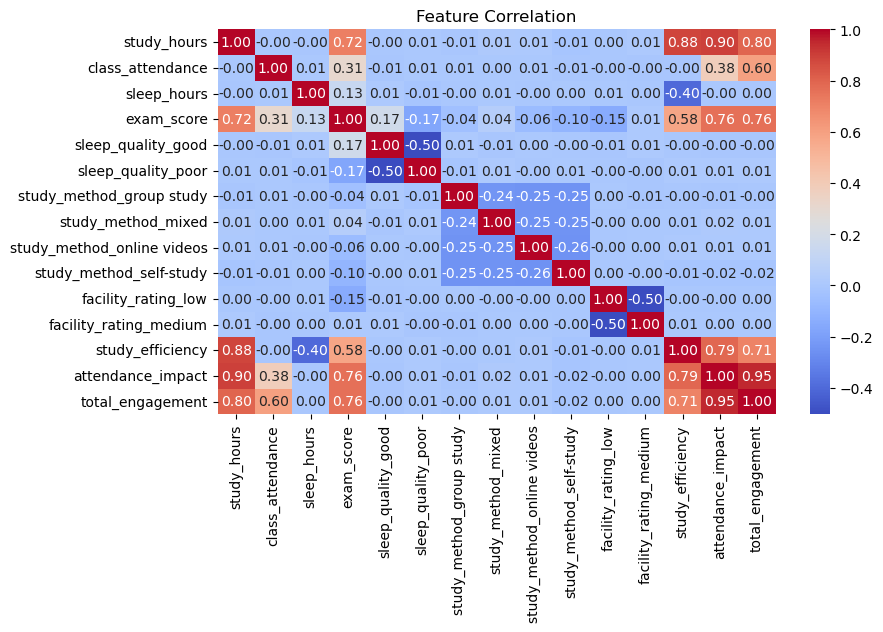

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

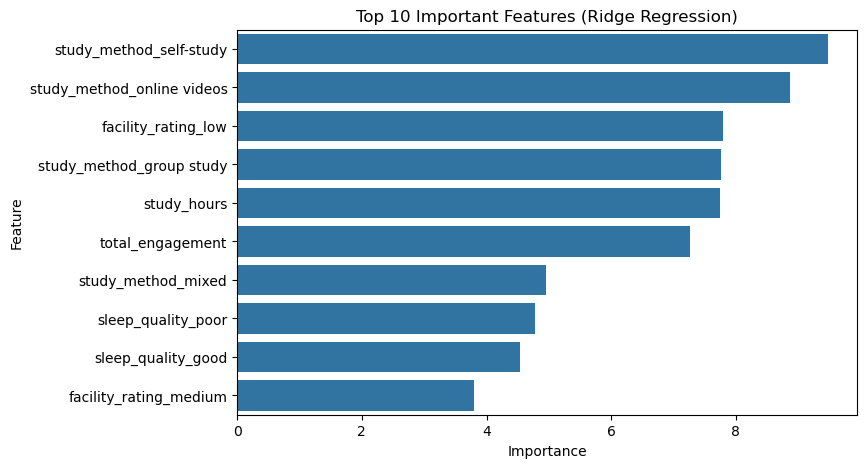

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

ridge_model = models[3][1] 

importances = np.abs(ridge_model.coef_)
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features (Ridge Regression)')
plt.show()